# **Problème des classes déséquilibrées en ML**

# [10 Techniques pour résoudre les classes déséquilibrées en apprentissage automatique](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

Mis à jour en 2023

## Introduction

En tant que data scientist, certains des problèmes les plus couramment rencontrés en classification binaire sont liés au déséquilibre des classes. Lorsqu'il y a une disparité dans le nombre d'observations dans chaque classe, on parle de déséquilibre de classe. Par exemple, pour détecter les transactions frauduleuses par carte de crédit, on peut avoir 400 transactions frauduleuses par rapport à 90000 transactions non frauduleuses.

![Déséquilibre de classe : Introduction](https://av-eks-blogoptimized.s3.amazonaws.com/1*GkhP_fliGHcijoiyp0I4Wg.png)

Le déséquilibre de classe est un problème courant en apprentissage automatique, en particulier dans les problèmes de classification. Les données déséquilibrées peuvent considérablement affecter la précision de nos modèles. Cela se produit dans de nombreux domaines, notamment la détection de fraudes, la détection de spams, le dépistage de maladies, le churn de souscription SaaS, les clics publicitaires, etc. Voyons comment gérer les données déséquilibrées en apprentissage automatique.

### Objectifs d'apprentissage

* Se familiariser avec le déséquilibre de classe grâce à des tutoriels de codage dans cet article.
* Comprendre les différentes techniques pour gérer les données déséquilibrées, telles que le **sous-échantillonnage aléatoire**, le **sur-échantillonnage aléatoire** et la méthode **NearMiss**.

## Table des matières

1. Le problème avec le déséquilibre de classe en apprentissage automatique
2. Exemple de détection de fraude par carte de crédit
3. Le piège de la métrique
4. Techniques de rééchantillonnage pour résoudre le déséquilibre de classe
5. Comment équilibrer les données avec le module Imbalanced-Learn Python ?
6. Avantages et inconvénients du sous-échantillonnage
7. Avantages et inconvénients du sur-échantillonnage
8. Conclusion
9. Foire aux questions
    * Q1. Comment échantillonner des données déséquilibrées en Python ?
    * Q2. Quel est le ratio des classes dans les données ? Comment savoir si les données sont équilibrées ou non ?
    * Q3. Comment classifier des données déséquilibrées ?

## 1\. Le problème de déséquilibre de classe en apprentissage automatique

La plupart des algorithmes d'apprentissage automatique fonctionnent mieux lorsque le nombre d'échantillons dans chaque classe est à peu près égal. Cela est dû au fait que la plupart des algorithmes sont conçus pour maximiser l'exactitude et réduire les erreurs.

Cependant, si le jeu de données présente des classes déséquilibrées, alors dans de tels cas, vous obtenez une précision assez élevée simplement en prédisant la classe majoritaire, mais vous n'arrivez pas à capturer la classe minoritaire, qui est souvent l'objectif principal de la création du modèle. Par exemple, si la répartition des classes montre que 99% des données ont la classe majoritaire, alors tout modèle de classification de base comme la régression logistique ou l'arbre de décision ne pourra pas identifier les points de données de la classe minoritaire.

## 2\. Exemple de détection de fraude à la carte de crédit

Références :
* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Disons que nous disposons d'un [**ensemble de données**](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) de sociétés de cartes de crédit où nous devons déterminer si la transaction par carte de crédit était frauduleuse ou non.

Mais voici le hic... les transactions frauduleuses sont relativement rares. Seuls 6% des transactions sont frauduleuses.

Maintenant, avant même de commencer, voyez-vous comment le problème pourrait se résoudre ? Imaginez que vous ne vous donniez pas la peine de former un modèle du tout. Au lieu de cela, que se passerait-il si vous écriviez simplement une seule ligne de code qui prédit toujours "pas de transaction frauduleuse".

```python
def transaction(transaction_data):
    return 'No fradulent transaction'
```

Eh bien, devinez quoi? Votre "solution" aurait une précision de 94%!

Malheureusement, cette précision est trompeuse.
* Pour toutes ces transactions **non frauduleuses**, vous auriez une précision de 100%.
* Pour les transactions qui sont **frauduleuses**, vous auriez une précision de 0%.
* Votre **précision globale serait élevée** simplement parce que la plupart des transactions ne sont pas frauduleuses (non pas parce que votre modèle est bon).

C'est clairement un problème car de nombreux algorithmes d'apprentissage automatique sont conçus pour maximiser la précision globale. Dans cet article, nous verrons différentes techniques pour gérer les données déséquilibrées.

### Ensemble de données d'exemple

Nous utiliserons un ensemble de données de détection de fraude de carte de crédit pour cet article. Vous pouvez trouver l'ensemble de données ici.

Après avoir chargé les données, affichez les cinq premières lignes de l'ensemble de données.

Vous pouvez clairement voir qu'il y a une énorme différence entre l'ensemble de données. 9000 transactions non frauduleuses et 492 frauduleuses.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Class
0    284315
1       492
Name: count, dtype: int64

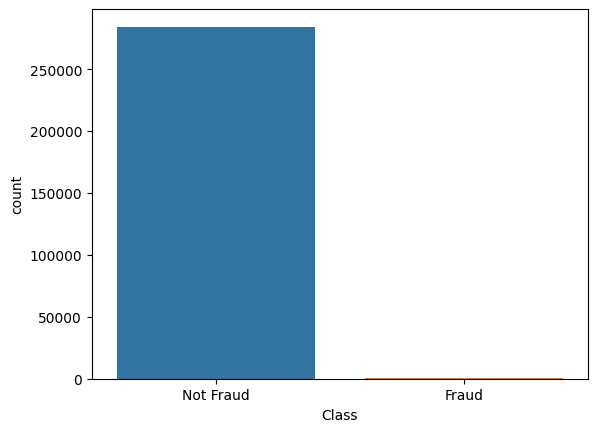

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('creditcard.csv')
display(data)
display(data.Class.value_counts())

g = sns.countplot(x=data.Class)
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

## 3\. Le piège des métriques

L'un des principaux problèmes auxquels les nouveaux utilisateurs de développeurs sont confrontés lorsqu'ils traitent des ensembles de données déséquilibrés concerne les métriques d'évaluation utilisées pour évaluer leur modèle d'apprentissage automatique. L'utilisation de métriques simples telles que le **score de précision** peut être trompeuse. Dans un ensemble de données avec des classes très déséquilibrées, le classificateur prédira toujours la classe la plus courante sans effectuer d'analyse des caractéristiques, et il aura un taux de précision élevé, mais ce ne sera évidemment pas le bon.

Prenons l'exemple de l'expérience en utilisant simplement `XGBClassifier` et sans ingénierie de caractéristiques:

In [2]:
%pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.6/70.9 MB 12.2 MB/s eta 0:00:06
     - -------------------------------------- 2.8/70.9 MB 30.1 MB/s eta 0:00:03
     --- ------------------------------------ 5.4/70.9 MB 43.5 MB/s eta 0:00:02
     ----- ---------------------------------- 9.0/70.9 MB 52.6 MB/s eta 0:00:02
     ------ -------------------------------- 11.8/70.9 MB 65.6 MB/s eta 0:00:01
     -------- ------------------------------ 15.2/70.9 MB 73.1 MB/s eta 0:00:01
     --------- ----------------------------- 18.0/70.9 MB 65.6 MB/s eta 0:00:01
     ----------- --------------------------- 21.5/70.9 MB 72.6 MB/s eta 0:00:01
     ------------- ------------------------- 24.5/70.9 MB 65.6 MB/s eta 0:00:01
     --------------- ----------------------- 27.5/70.9 MB 65.2 MB/s eta 0:00:01
     ---------------- ---------------------- 30.7/70.9 MB 65.2 MB/s eta 0:00:01
     ------------------ -------------------- 33.

In [3]:
X_y = data.values
print(X_y.shape)
display(X_y)
X = X_y[:, :-1]
y = X_y[:, -1]

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=.33, random_state=42)
display(X_train.shape)

(284807, 31)


array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

(190820, 30)

In [4]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Train
xgb_model = XGBClassifier().fit(X_train, y_train)

# Predict
xgb_y_predict = xgb_model.predict(X_test)

# Accuracy and balanced acurracy scores
xgb_score = accuracy_score(xgb_y_predict, y_test)
xgb_balanced_score = balanced_accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
# :: Accuracy score is: 0.992

print('Balanced accuracy score is:', xgb_balanced_score)
# :: Accuracy score is: 0.992

Accuracy score is: 0.9996488876121166
Balanced accuracy score is: 0.9764186672295678


Nous pouvons voir une précision de 99%, nous obtenons une précision très élevée car il prédit principalement la classe majoritaire qui est 0 (non frauduleux).

## 4\. Techniques de rééchantillonnage pour résoudre le déséquilibre des classes

L'une des techniques de traitement de déséquilibre de classe largement adoptées pour traiter les ensembles de données fortement déséquilibrés s'appelle le rééchantillonnage. Il consiste à supprimer des échantillons de la classe majoritaire (sous-échantillonnage) et/ou à ajouter plus d'exemples de la classe minoritaire (sur-échantillonnage).

![](https://av-eks-blogoptimized.s3.amazonaws.com/1*H6XodlitlGDl9YdbwaZLMw.png)

Malgré l'avantage de l'équilibrage des classes, ces techniques ont également leurs faiblesses (il n'y a pas de repas gratuit).

La mise en œuvre la plus simple de la sur-échantillonnage consiste à dupliquer des enregistrements aléatoires de la classe minoritaire, ce qui peut causer une suradaptation.

Dans le sous-échantillonnage, la technique la plus simple consiste à supprimer des enregistrements aléatoires de la classe majoritaire, ce qui peut causer une perte d'informations.

Implémentons cela avec l'exemple de la détection de fraude par carte de crédit.

Nous commencerons par séparer la classe qui sera 0 et la classe 1.

In [5]:
# Class count
class_count_0, class_count_1 = data.Class.value_counts()

# Separate class
class_0 = data[data.Class == 0]
class_1 = data[data.Class == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


### Sous-échantillonnage aléatoire

Le sous-échantillonnage peut être défini comme la suppression de certaines observations de la classe majoritaire. Cela se fait jusqu'à ce que la classe majoritaire et minoritaire soient équilibrées.

Le sous-échantillonnage peut être un bon choix lorsque vous avez une tonne de données - pensez à des millions de lignes. Mais un inconvénient du sous-échantillonnage est que nous supprimons des informations qui peuvent être précieuses.

total class of 1 and 0:


Class
0    492
1    492
Name: count, dtype: int64

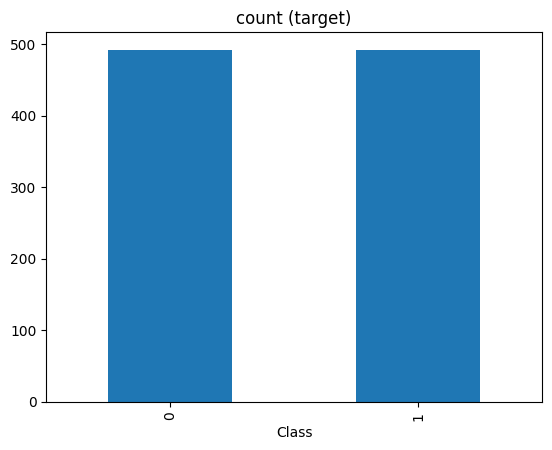

In [6]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:")
display(test_under.Class.value_counts())

# Plot the count after under-sampeling
test_under.Class.value_counts().plot(kind='bar', title='count (target)');

### Sur-échantillonnage aléatoire

La sur-échantillonnage peut être définie comme l'ajout de plus de copies à la classe minoritaire. La sur-échantillonnage peut être un bon choix lorsque vous n'avez pas beaucoup de données à travailler.

Un inconvénient à considérer lors de la sous-échantillonnage est qu'elle peut causer une suradaptation et une mauvaise généralisation à votre ensemble de test.

total class of 1 and 0:


Class
0    492
1    492
Name: count, dtype: int64

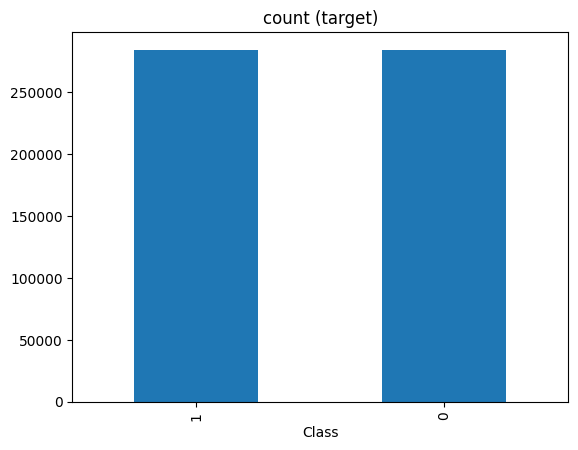

In [7]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:")
display(test_under.Class.value_counts())

# Plot the count after under-sampeling
test_over.Class.value_counts().plot(kind='bar', title='count (target)');

## 5\. Comment équilibrer des données avec le module Python Imbalanced-Learn ?

Références :
* https://imbalanced-learn.org/stable/install.html
* https://imbalanced-learn.org/stable/introduction.html
* https://imbalanced-learn.org/stable/references/index.html
* https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples

Un certain nombre de techniques de rééchantillonnage plus sophistiquées ont été proposées dans la littérature scientifique.

Par exemple, nous pouvons regrouper les enregistrements de la classe majoritaire et effectuer un sous-échantillonnage en supprimant des enregistrements de chaque cluster, cherchant ainsi à préserver les informations. Dans le suréchantillonnage, au lieu de créer des copies exactes des enregistrements de la classe minoritaire, nous pouvons introduire de légères variations dans ces copies, créant ainsi des échantillons synthétiques plus diversifiés.

**Appliquons quelques-unes de ces techniques de rééchantillonnage** en utilisant la bibliothèque Python [**`imbalanced-learn`**](https://imbalanced-learn.org/stable/). Elle est compatible avec scikit-learn et fait partie des projets scikit-learn-contrib.

In [27]:
%pip install -U imbalanced-learn


     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00


```.. _getting_started:

###############
Getting Started
###############

Prerequisites
=============

You can find the complete list of the dependencies in the following table:

.. include:: min_dependency_table.rst```

In [8]:
import imblearn

### Sous-échantillonnage aléatoire avec Imblearn

Vous avez peut-être entendu parler de pandas, numpy, matplotlib, etc. tout en apprenant la science des données. Mais il existe une autre bibliothèque : Imblearn, qui est utilisée pour échantillonner des ensembles de données déséquilibrés et améliorer les performances de votre modèle.

[**`RandomUnderSampler`**](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html?highlight=fit_resample#imblearn.under_sampling.RandomUnderSampler.fit_resample) est un moyen rapide et facile d'équilibrer les données en sélectionnant aléatoirement un sous-ensemble de données pour les classes ciblées. Sous-échantillonner les classes majoritaires en choisissant aléatoirement des échantillons avec ou sans remplacement.

In [10]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Fit predictor and target variable
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0.0: 284315, 1.0: 492})
Resample dataset shape Counter({0.0: 492, 1.0: 492})


### Sur-échantillonnage aléatoire avec Imblearn

Une façon de lutter contre les données déséquilibrées consiste à **générer de nouveaux échantillons** dans les classes minoritaires. La stratégie la plus naïve est de générer de nouveaux échantillons en échantillonnant aléatoirement avec remplacement les échantillons actuellement disponibles. Le [**`RandomOverSampler`**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html?highlight=randomoversampler#imblearn.over_sampling.RandomOverSampler.fit_resample) offre un tel schéma.

In [9]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 284315, 1.0: 492})
Resample dataset shape Counter({0.0: 284315, 1.0: 284315})


### Sous-échantillonnage : Liens Tomek

Les liens Tomek sont des paires d'instances très proches mais de classes opposées. Supprimer les instances de la classe majoritaire de chaque paire augmente l'espace entre les deux classes, facilitant le processus de classification.

Le lien de Tomek existe si les deux échantillons sont les voisins les plus proches l'un de l'autre.

![](https://av-eks-blogoptimized.s3.amazonaws.com/1*KxFmI15rxhvKRVl-febp-Q.png)

Dans le code ci-dessous, nous utiliserons `ratio='majority'` pour échantillonner la classe majoritaire.

[**`TomekLinks`**](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html?highlight=tomeklinks#imblearn.under_sampling.TomekLinks.fit_resample)

In [11]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 284315, 1.0: 492})
Resample dataset shape Counter({0.0: 284315, 1.0: 284315})


### Technique de suréchantillonnage synthétique de la minorité (SMOTE)

Cette technique génère des données synthétiques pour la classe minoritaire.

SMOTE (Synthetic Minority Oversampling Technique) fonctionne en choisissant aléatoirement un point de la classe minoritaire et en calculant les k voisins les plus proches pour ce point. Les **points synthétiques sont ajoutés** entre le point choisi et ses voisins.

![](https://av-eks-blogoptimized.s3.amazonaws.com/1*yRumRhn89acByodBz0H7oA.png)

**L'algorithme SMOTE** fonctionne en 4 étapes simples :
1. Choisir une classe minoritaire comme vecteur d'entrée.
2. Trouver ses k voisins les plus proches (`k_neighbors` est spécifié comme argument dans la fonction `SMOTE()`).
3. Choisir l'un de ces voisins et placer un point synthétique n'importe où sur la ligne joignant le point considéré et son voisin choisi.
4. Répéter les étapes jusqu'à ce que les données soient équilibrées.

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 284315, 1.0: 492})
Resample dataset shape Counter({0.0: 284315, 1.0: 284315})


### NearMiss

NearMiss est une technique de sous-échantillonnage. Au lieu de rééchantillonner la classe minoritaire, l'utilisation d'une distance permettra de rendre la classe majoritaire égale à la classe minoritaire.

In [13]:
from collections import Counter
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0.0: 284315, 1.0: 492})
Resample dataset shape: Counter({0.0: 492, 1.0: 492})


### Changer la métrique de performance

La précision n'est pas la meilleure métrique à utiliser lors de l'évaluation de jeux de données déséquilibrés, car elle peut être trompeuse.

Les métriques qui peuvent fournir une meilleure compréhension sont :
* **Matrice de confusion** : un tableau montrant les prédictions correctes et les types de prédictions incorrectes.
* **Précision** : le nombre de vrais positifs divisé par toutes les prédictions positives. La précision est également appelée valeur prédictive positive. C'est une mesure de l'exactitude d'un classificateur. Une faible précision indique un grand nombre de faux positifs.
* **Rappel** : le nombre de vrais positifs divisé par le nombre de valeurs positives dans les données de test. Le rappel est également appelé sensibilité ou taux de vrais positifs. C'est une mesure de l'exhaustivité d'un classificateur. Un faible rappel indique un grand nombre de faux négatifs.
* **Score F1** : la moyenne pondérée de la précision et du rappel.
* **Aire sous la courbe ROC** (AUROC) : l'AUROC représente la probabilité que votre modèle distingue des observations de deux classes. En d'autres termes, si vous sélectionnez au hasard une observation de chaque classe, quelle est la probabilité que votre modèle puisse les "classer" correctement ?

### Pénaliser les algorithmes (formation sensible aux coûts)

La prochaine tactique consiste à utiliser des algorithmes d'apprentissage pénalisés qui augmentent le coût des erreurs de classification dans la classe minoritaire.

Un algorithme populaire pour cette technique est Penalized-SVM.

Pendant l'entraînement, nous pouvons utiliser l'argument `class_weight='balanced'` pour pénaliser les erreurs sur la classe minoritaire d'un montant proportionnel à sa sous-représentation.

Nous voulons également inclure l'argument `probability=True` si nous voulons activer les estimations de probabilité pour les algorithmes SVM.

Entraînons un modèle en utilisant Penalized-SVM sur l'ensemble de données déséquilibré d'origine :

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)  # check performance
print('ROCAUC score:', roc_auc_score(y_test, svc_predict))
print('Accuracy score:', accuracy_score(y_test, svc_predict))
print('F1 score:', f1_score(y_test, svc_predict))